
This is a fun but challenging problem set. It will test your python skills, as well as your understanding of the material in class and in the readings. Start early and debug often! Some notes:

* Part 1 is meant to be easy, so get through it quickly.
* Part 2 (especially 2.1) will be difficult, but it is the lynchpin of this problem set to make sure to do it well and understand what you've done. If you find your gradient descent algorithm is taking more than a few minutes to complete, debug more, compare notes with others, and go to the Lab sessions (especially the sections on vectorized computation and computational efficiency).
* Depending on how well you've done 2.1, parts 2.3 and 4.3 will be relatively painless or incredibly painful. 

* Part 4 (especially 4.3) will be computationally intensive. Don't leave this until the last minute, otherwise your code might be running when the deadline arrives.

* Do the extra credit problems last. This can help you increase your scores

---

## Introduction to the assignment

As with the last assignment, you will be using the [Boston Housing Prices Data Set](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names).

In [1]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn

%matplotlib inline  
import matplotlib.pyplot as plt  
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
# Additional imports
from statsmodels.formula.api  import ols
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load you data the Boston Housing data into a dataframe
# MEDV.txt containt the median house values and data.txt the other 13 features
# in order ["CRIM", "ZN", "INDUS", "CHAS", "NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]
# Your code here

# load the text files to numpy arrays
data = np.loadtxt('data.txt')
target = np.loadtxt('target.txt')

# turn the numpy array into a pandas dataframe 
boston_data = pd.DataFrame(data)
boston_data.columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
#adding the target colunm (MEDV) to the boston dataframe
boston_data['MEDV']= target
# see the head of the df
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.218960,18.0,2.629288,0.0,0.869420,6.875396,65.2,4.347275,1.0,307.0,15.534711,397.462329,5.715647,24.0
1,0.141576,0.0,7.315612,0.0,0.549711,6.499894,78.9,5.315684,2.0,255.0,17.914131,397.012611,9.338417,21.6
2,0.380457,0.0,7.340354,0.0,0.697928,7.263489,61.1,5.356935,2.0,243.0,17.919989,396.628236,4.142473,34.7
3,0.313563,0.0,2.562407,0.0,0.599629,7.209732,45.8,6.103983,3.0,226.0,18.979527,398.564784,3.239272,33.4
4,0.330105,0.0,2.497337,0.0,0.476077,7.184111,54.2,6.264372,3.0,234.0,18.708888,399.487766,6.115159,36.2


---

## Part 1: Getting oriented


### 1.1 Use existing libraries

Soon, you will write your own gradient descent algorithm, which you will then use to minimize the squared error cost function.  First, however, let's use the canned versions that come with Python, to make sure we understand what we're aiming to achieve.

Using the same Boston housing prices dataset, use the [Linear Regression class](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from sklearn or the [OLS class](http://wiki.scipy.org/Cookbook/OLS) from SciPy to explore the relationship between median housing price and number of rooms per house. Do the following:

(a) Regress the housing price on the number of rooms per house. Draw a scatter plot of housing price (y-axis) against rooms (x-axis), and draw the regression line in blue.  You might want to make the dots semi-transparent if it improves the presentation of the figure. 

(b) Regress the housing price on the number of rooms per house and the (number of rooms per house) squared.  Show the (curved) regression line in green. 

(c) Interpret your results.

##### (a) Regress the housing price on the number of rooms per house. 

- Draw a scatter plot of housing price (y-axis) against rooms (x-axis)
- draw the regression line in blue

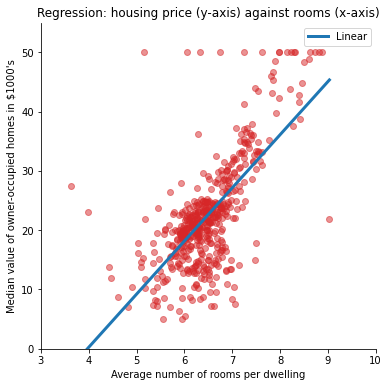

In [3]:
# Regressing the housing price on the number of rooms per house
model1 = ols(formula = 'MEDV ~  RM', data = boston_data).fit()
#model1.summary()

X=boston_data['RM'].copy()
Y=boston_data['MEDV'].copy()
X_sorted_idx=np.argsort(boston_data['RM'].values)
X_sorted = X.sort_values()

#Plotting
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot()

#Predictions from Models
Y_a_plot = model1.params[0] + model1.params[1]*X_sorted
ax.plot(X_sorted, Y_a_plot, c='C0', lw=3, label='Linear', zorder=2)
ax.scatter(X, Y, alpha=0.5, c='C3')
plt.axis([3,10,0,55])
ax.set_xlabel('Average number of rooms per dwelling')
ax.set_ylabel("Median value of owner-occupied homes in $1000's")
plt.title("Regression: housing price (y-axis) against rooms (x-axis)")

ax.legend()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#### (b) Regressing the housing price on the number of rooms per house and the (number of rooms per house) squared 
- Show the (curved) regression line in green.


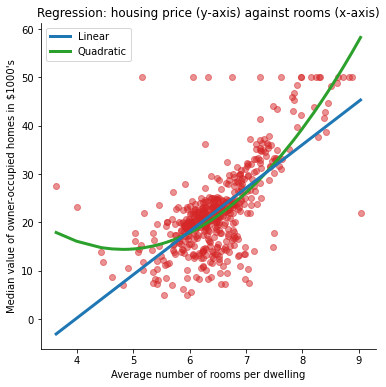

In [4]:
model2 = ols(formula = 'MEDV ~  RM +  I(RM**2)', data = boston_data).fit()
#model2.summary()

#Plotting
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot()

#Predictions from Models
Y_a_plot = model1.params[0] + model1.params[1]*X_sorted
ax.plot(X_sorted, Y_a_plot, c='C0', lw=3, label='Linear', zorder=2)
ax.scatter(X, Y, alpha=0.5, c='C3')
Y_b_plot = model2.params[0] + model2.params[1]*(X_sorted) + model2.params[2]*(X_sorted**2)
ax.plot(X_sorted, Y_b_plot, c='C2', lw=3, label='Quadratic', zorder=1)
#plt.axis([3,10,10,55])
ax.set_xlabel('Average number of rooms per dwelling')
ax.set_ylabel("Median value of owner-occupied homes in $1000's")
plt.title("Regression: housing price (y-axis) against rooms (x-axis)")

ax.legend()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#### (c) Interpretation

By just looking at the second graph, were the 2 regressions are plotted, most of the points in the dataset are concentrated between 5-8 rooms per dwelling (x-axis) and average median prices 10k-40k dollars (y-axis), with some skeweness in the 50k range.
The general trend is that the more the rooms per dwelling, the higher the median house price, with the exception of houses with 3-5 rooms, where we see a slight dicrease in value. The quadratic curve seems to be a better fit for the distribution, since it captures this exception (rooms 3-5), but other than that, by just looking at the graph, we can't conclude much.

Alternatively, we can look at the OLS summary and observe the R-square (they are commented out)

Model a)
* R-Squared: 0.473
* Adjusted R-Squared: 0.472

Model b)
* R-Squared:0.539
* Adjusted R-Squared:0.538

From the OLS summaries, we can see that model b with quadratic interaction has improved in adjusted r-squared, meaning that it has better goodness of fit as compared to model a which only has the linear interaction between the dependent and the independent variables.

### 1.2 Training and testing

Chances are, for the above problem you used all of your data to fit the regression line. In some circumstances this is a reasonable thing to do, but often this will result in overfitting. Let's redo the above results the ML way, using careful cross-validation.  Since you are now experts in cross-validation, and have written your own cross-validation algorithm from scratch, you can now take a shortcut and use the libraries that others have built for you.

Using the [cross-validation functions](http://scikit-learn.org/stable/modules/cross_validation.html) from scikit-learn, use 5-fold cross-validation to fit the regression model (a) from 1.1, i.e. the linear fit of housing price on number of rooms per house. Each fold of cross-validation will give you one slope coefficient and one intercept coefficient.  Create a new scatterplot of housing price against rooms, and draw the five different regression lines in light blue, and the oroginal regression line from 1.1 in red (which was estimated using the full dataset). What do you notice?

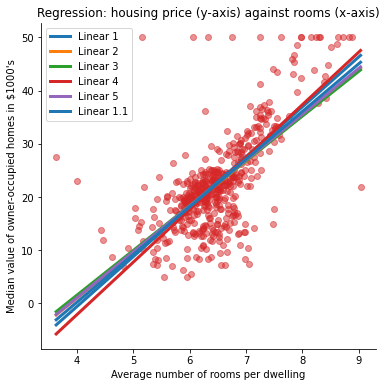

Below you can find the slope & intercept for each regression line


,label,alpha,beta
0,Linear 1,-38.067059,9.379360
1,Linear 2,-33.304497,8.585825
2,Linear 3,-32.054062,8.410044
3,Linear 4,-41.521342,9.863039
4,Linear 5,-33.346966,8.615974
5,Linear 1.1,-35.576207,8.959927


In [5]:
# your code here
n_folds=5
kf = KFold(n_splits=n_folds, shuffle=True, random_state=11)

#Getting index
train_idx = []
test_idx = []
for train, test in kf.split(X):
    train_idx.append(train)
    test_idx.append(test)
    
#Fitting Regression
coeffs = []

#Plotting
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot()

for i in range(n_folds):
    model = LinearRegression().fit(X[train_idx[i]].values.reshape(-1,1), Y[train_idx[i]])
    Y_plot = model.intercept_ + model.coef_[0]*X_sorted
    ax.plot(X_sorted, Y_plot, c='C{0:.0f}'.format(i), lw=3, label='Linear {0:.0f}'.format(i+1), zorder=2)
    coeffs.append(['Linear {0:.0f}'.format(i+1), model.intercept_, model.coef_[0]])   

Y_a_plot = model1.params[0] + model1.params[1]*X_sorted
ax.plot(X_sorted, Y_a_plot, c='C0', lw=3, label='Linear 1.1', zorder=2)
ax.scatter(X, Y, alpha=0.5, c='C3')
coeffs.append(['Linear 1.1', model1.params[0], model1.params[1]])  
ax.set_xlabel('Average number of rooms per dwelling')
ax.set_ylabel("Median value of owner-occupied homes in $1000's")
plt.title("Regression: housing price (y-axis) against rooms (x-axis)")


ax.legend()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show(fig)

print("Below you can find the slope & intercept for each regression line")
df = pd.DataFrame(coeffs, columns=['label','alpha', 'beta'])
df

### Discussion

By using sklearn's KFold function, we are able to suffle the data (randomization) and split it into test and train. Through this process I was able to perform a 5-fold cross-validation fit of the regression model and get for each fold the intercept (model.intercept_) and a slope (model.coef_[0]).
To distinguish each of the lines, I used the iterating variable to change the color and the legend name. All 5 lines along with the regression line from 1.1 don't differ that much from each other.

## Part 2: Gradient descent: Linear Regression

This is where it gets fun!

### 2.1 Implement gradient descent with one independent variable (average rooms per house)

Implement the batch gradient descent algorithm that we discussed in class. Use the version you implement to regress the housing price on the number of rooms per house. Experiment with 3-4 different values of the learning rate *R*, and do the following:

* Report the values of alpha and beta that minimize the loss function
* Report the number of iterations it takes for your algorithm to converge (for each value of *R*)
* Report the total running time of your algorithm, in seconds
* How do your coefficients compare to the ones estimated through standard libraries? Does this depend on *R*?

Some skeleton code is provided below, but you should feel free to delete this code and start from scratch if you prefer.

* *Hint 1: Don't forget to implement a stopping condition, so that at every iteration you check whether your results have converged. Common approaches to this are to (a) check to see if the loss has stopped decreasing; and (b) check if both your current parameter esimates are close to the estimates from the previous iteration.  In both cases, "close" should not be ==0, it should be <=epsilon, where epsilon is something very small (like 0.0001).*
* *Hint 2: Some people like to include a MaxIterations parameter in their gradient descent algorithm, to prevent divergence. *

In [6]:
import time

"""
Function
--------
bivariate_ols
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalues, yvalues : narray
    xvalues: independent variable
    yvalues: dependent variable
    
alpha_int : float
    initial alpha

beta_int : float
    initial beta
    
epsilon : float
    Threshold for convergence 
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta: float
    co-efficient
"""
def bivariate_ols(xvalues, yvalues, alpha_int, beta_int, epsilon, R=0.01, MaxIterations=1000):
    # initialize the parameters
    start_time = time.time()
    #Used initialized coefficients
    alpha = alpha_int
    beta = beta_int
    
    N = len(yvalues)
    # Loop till maximum iterations are achieved
    for i in range(MaxIterations):
        
        # compute new coefficients
        new_alpha = alpha - ((R/N) * np.sum(alpha + beta*xvalues - yvalues))
        new_beta = beta - ((R/N) * np.sum((alpha + beta*xvalues - yvalues)*xvalues))
        # Check for stopping criteria
        if (np.abs(new_alpha-alpha)<epsilon) and (np.abs(new_beta-beta)<epsilon):
            alpha = new_alpha
            beta = new_beta
            break
        else:
            alpha = new_alpha
            beta = new_beta
    
    # Calculate the number of iteration
    iterations = i+1
    if iterations==MaxIterations:
        print("Stopped because maximum number of iterations reached!!!")    
     
    print("Total Iterations: "+ str(iterations))
    print("Time taken: {:.2f} seconds".format(time.time() - start_time))
    return alpha, beta

# example function call
#print(bivariate_ols(X, Y, alpha_int, beta_int, R=0.01, epsilon=0.000001, MaxIterations=50000))

In [7]:
X = boston_data['RM'].values.copy()
Y = boston_data['MEDV'].values.copy()

# initialize alpha and beta
alpha_int = 0
beta_int = 1

# R = 0.01
print('For R = 0.01')
alpha, beta = bivariate_ols(X, Y, alpha_int, beta_int,R=0.01, epsilon=0.000001, MaxIterations=100000)
print('alpha = {:.2f}'.format(alpha))
print('beta  = {:.2f}'.format(beta))

print()
# R = 0.001
print('For R = 0.001')
alpha, beta = bivariate_ols(X, Y, alpha_int, beta_int,R=0.001, epsilon=0.00001, MaxIterations=50000)
print('alpha = {:.2f}'.format(alpha))
print('beta  = {:.2f}'.format(beta))

print()
# R = 0.0001
print('For R = 0.0001')
alpha, beta = bivariate_ols(X, Y,alpha_int, beta_int,R=0.0001, epsilon=0.00001, MaxIterations=50000)
print('alpha = {:.2f}'.format(alpha))
print('beta  = {:.2f}'.format(beta))

print()
# R = 0.00001
print('For R = 0.00001')
alpha, beta = bivariate_ols(X, Y,alpha_int, beta_int,R=0.00001, epsilon=0.00001, MaxIterations=50000)
print('alpha = {:.2f}'.format(alpha))
print('beta  = {:.2f}'.format(beta))

For R = 0.01
Total Iterations: 72847
Time taken: 2.26 seconds
alpha = -35.57
beta  = 8.96

For R = 0.001
Stopped because maximum number of iterations reached!!!
Total Iterations: 50000
Time taken: 3.46 seconds
alpha = -15.26
beta  = 5.86

For R = 0.0001
Stopped because maximum number of iterations reached!!!
Total Iterations: 50000
Time taken: 3.50 seconds
alpha = -1.62
beta  = 3.78

For R = 0.00001
Total Iterations: 10899
Time taken: 0.72 seconds
alpha = 0.33
beta  = 3.46


In [8]:
#Coefficientts from standard libraries 
model1.params

Intercept   -35.576207
RM            8.959927
dtype: float64

### Discussion

As we can see from the results, through the Gradient Decent function, we are able to output the optimal intercept (alpha) and slope (beta) of the linear regression.
By using different learning rates, I was getting different alpha & beta.Through the 5 examples, the following hyperparameters produced the closest result to the one from the sklearn function:
- R=0.01, epsilon=0.000001, MaxIterations=100000
- Total Iterations: 72847
- Time taken: 2.20 seconds
- alpha      = -35.57
- beta       = 8.96

### 2.2 Data normalization (done for you!)

Soon, you will implement a version of gradient descent that can use an arbitrary number of independent variables. Before doing this, we want to give you some code in case you want to standardize your features.

In [9]:
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

### 2.3 Implement gradient descent with an arbitrary number of independent variables

Now that you have a simple version of gradient descent working, create a version of gradient descent that can take more than one independent variable.  Assume all independent variables will be continuous.  Test your algorithm using TAX and RM as independent variables. Standardize these variables before inputting them to the gradient descent algorithm. 

As before,  report and interpret your estimated coefficients, the number of iterations before convergence, and the total running time of your algorithm. Experiment with 2-3 different values of R.

* *Hint 1: Be careful to implement this efficiently, otherwise it might take a long time for your code to run. Commands like `np.dot` can be a good friend to you on this problem*

In [10]:
"""
Function
--------
multivariate_ols
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalue_matrix, yvalues : narray
    xvalue_matrix: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    
Returns
-------
alpha: float
    intercept
    
beta_array: array[float]
    co-efficient
"""

def multivariate_ols(xvalue_matrix, yvalues, alpha_int, betas_int, epsilon, R, MaxIterations):
    
    # start the clock
    start_time = time.time()
    
    # use initial coefficients provided
    alpha = alpha_int
    beta = betas_int
    
    N = len(yvalues)
    
    # loop until the max iterations
    for i in range(MaxIterations):
        
        # compute new coefficients
        new_alpha = alpha - ((R/N) * np.sum(alpha + np.sum(beta*xvalue_matrix, axis=1) - yvalues))
        new_beta = beta - ((R/N) * np.sum((alpha + np.sum(beta*xvalue_matrix, axis=1) - yvalues)*(xvalue_matrix.T), axis=1))

        # check to see the stopping condition
        if (np.abs(new_alpha-alpha)<epsilon) and np.all(np.abs(new_beta-beta)<epsilon):
            alpha = new_alpha
            beta = new_beta
            break
        else:
            alpha = new_alpha
            beta = new_beta
            
    #total iterations
    iterations = i+1
    
    if iterations==MaxIterations:
        print("Stopped because maximum number of iterations reached!!!")    
     
    print("Total Iterations: "+ str(iterations))
    print("Time taken: {:.2f} seconds".format(time.time() - start_time))
    
    return alpha, beta

In [11]:
X = standardize(boston_data[['TAX','RM']].values.copy())
Y = boston_data['MEDV'].values.copy()

# initial alpha, beta
alpha_int = 0
beta_int = np.array([0,0])

# R = 0.1
print('For R = 0.1')
alpha, beta = multivariate_ols(X, Y, alpha_int, beta_int, R=0.1, epsilon=0.00001, MaxIterations=70000)
print('alpha = {:.2f}'.format(alpha))
print('betas = {:.2f}, {:.2f}'.format(beta[0], beta[1]))
print()

# R = 0.01
print('For R = 0.01')
alpha, beta = multivariate_ols(X, Y, alpha_int, beta_int, R=0.01, epsilon=0.00001, MaxIterations=70000)
print('alpha = {:.2f}'.format(alpha))
print('betas = {:.2f}, {:.2f}'.format(beta[0], beta[1]))

print()
# R = 0.0001
print('For R = 0.0001')
alpha, beta = multivariate_ols(X, Y, alpha_int, beta_int, R=0.0001, epsilon=0.00001, MaxIterations=70000)
print('alpha = {:.2f}'.format(alpha))
print('betas = {:.2f}, {:.2f}'.format(beta[0], beta[1]))

For R = 0.1
Total Iterations: 126
Time taken: 0.03 seconds
alpha = 22.53
betas = -2.72, 5.54

For R = 0.01
Total Iterations: 999
Time taken: 0.15 seconds
alpha = 22.53
betas = -2.72, 5.54

For R = 0.0001
Total Iterations: 54174
Time taken: 6.67 seconds
alpha = 22.43
betas = -2.75, 5.51


### Discussion
* 1. The smaller the value (step) of the learning rate (R) gets, the more time it takes for the function to converge.
* 2. As the learning rate step gets smaller, it takes more iterations to converge (approach a minimum).
* 3. The value of the rate (R) also affects the values of the parameters (alpha & betas).

### 2.4 Compare standardized vs. non-standardized results

Repeat the analysis from 2.3, but this time do not standardize your variables - i.e., use the original data. Use the same three values of R (0.1, 0.01, and 0.001). What do you notice about the running time and convergence properties of your algorithm?

In [12]:
#Same experiment as 2.3 without standardizing X
X = boston_data[['TAX','RM']].values.copy()
Y = boston_data['MEDV'].values.copy()

# initial alpha, beta
alpha_int = 0
beta_int = np.array([0,0])

# R = 0.1
print('For R = 0.1')
alpha, beta = multivariate_ols(X, Y, alpha_int, beta_int, R=0.1, epsilon=0.00001, MaxIterations=1000000)
print('alpha = {:.2f}'.format(alpha))
print('betas = {:.2f}, {:.2f}'.format(beta[0], beta[1]))
print()

# R = 0.01
print('For R = 0.01')
alpha, beta = multivariate_ols(X, Y, alpha_int, beta_int, R=0.01, epsilon=0.00001, MaxIterations=1000000)
print('alpha = {:.2f}'.format(alpha))
print('betas = {:.2f}, {:.2f}'.format(beta[0], beta[1]))

print()
# R = 0.0001
print('For R = 0.0001')
alpha, beta = multivariate_ols(X, Y, alpha_int, beta_int, R=0.0001, epsilon=0.00001, MaxIterations=1000000)
print('alpha = {:.2f}'.format(alpha))
print('betas = {:.2f}, {:.2f}'.format(beta[0], beta[1]))

For R = 0.1
Stopped because maximum number of iterations reached!!!
Total Iterations: 1000000
Time taken: 108.29 seconds
alpha = nan
betas = nan, nan

For R = 0.01
Stopped because maximum number of iterations reached!!!
Total Iterations: 1000000
Time taken: 143.50 seconds
alpha = nan
betas = nan, nan

For R = 0.0001
Stopped because maximum number of iterations reached!!!
Total Iterations: 1000000
Time taken: 96.00 seconds
alpha = nan
betas = nan, nan


### Discussion

Without standardization, the model fails to converge & produce parameter values. Even after increasing the no of max iterations to 1 million, with learning rate of 0.1-0.0001, the algorithm didn't converge. I tried multiple options, up to the point of the laptop crashing, so I conclude that due to the discrepancy on the data (different scales accross features), it's challenging for the model to work and is unable to find values for the parameters alpha and beta.

## 3. Prediction

Let's use our fitted model to make predictions about housing prices. Make sure to first standardize your features before proceeding.

### 3.1 Cross-Validation

Unless you were careful above, you probably overfit your data again. Let's fix that. Use 5-fold cross-validation to re-fit the multivariate regression from 2.3 above, and report your estimated coefficients (there should be three, corresponding to the intercept and the two coefficients for TAX and RM). Since there are 5 folds, there will be 5 sets of three coefficients -- report them all in a 5x3 table.

In [13]:
# Cross-Validation: k-folds

# standardize features
X = standardize(boston_data[['TAX','RM']].values.copy())
Y = boston_data['MEDV'].values.copy()

# 5-fold cross-validation
n_folds=5
kf = KFold(n_splits=n_folds, shuffle=True, random_state=11)

# Getting index
train_idx = []
test_idx = []
for train, test in kf.split(X):
    train_idx.append(train)
    test_idx.append(test)

alpha_int = 0 # each fold initialize alpha 
beta_int = np.array([0,0]) # each fold initialize both betas 

# Dataframe to store the parameters alpha & betas
coeffs = []

for i in range(n_folds):
    alpha, beta = multivariate_ols(X[train_idx[i]], Y[train_idx[i]], alpha_int, beta_int, 0.00001, 0.0001, 70000)
    coeffs.append([alpha, beta[0], beta[1]])

df = pd.DataFrame(coeffs, columns=['alpha', 'betaTAX', 'betaRM'])
df

Total Iterations: 54526
Time taken: 5.09 seconds
Total Iterations: 54301
Time taken: 4.54 seconds
Total Iterations: 54705
Time taken: 4.38 seconds
Total Iterations: 54088
Time taken: 5.15 seconds
Total Iterations: 54393
Time taken: 5.77 seconds


,alpha,betaTAX,betaRM
0,22.602657,-2.515915,5.823748
1,22.367935,-2.860958,5.244868
2,22.489013,-2.545882,5.152059
3,22.155135,-2.940217,6.167367
4,22.474308,-2.912832,5.187838


### Discussion

There is a change in the values of the parameters (alpha & the 2 betas) after dividing the data into train and test set and estimating the value of coefficients on train set again. Here are some observations:
##### 2.3 (epsilon = 0.00001, R = 0.001, MaxIterations = 70000):

- Total Iterations: 54174
- Time taken: 5.11 seconds
- alpha = 22.43
- betas = -2.75, 5.51

##### 3.1 (epsilon = 0.00001, R = 0.001, MaxIterations = 70000): varied results among the 5 folds

- Total Iterations: 54088-54705
- Time taken: 4.14-4.45 seconds
- alpha = 22.1 - 22.6
- betas 1 = from -2.5 to -2.9 
- beta 2: 5.1 to 6.1

Since it's a 5-fold split, each fold has an equal amount of data and both the runtime & iteration count is very comparable among each fold.

### 3.2 Predicted values and RMSE

Let's figure out how accurate this predictive model turned out to be. Compute the cross-validated RMSE for each of the 5 folds above. In other words, in fold 1, use the parameters estimated on the 80% of the data to make predictions for the 20%, and calculate the RMSE for those 20%. Repeate this for the remaining folds. Report the RMSE for each of the 5-folds, and the average (mean) RMSE across the five folds. How does this average RMSE compare to the performance of your nearest neighbor algorithm from the last problem set?

In [14]:
rmse_mean = []

for i in range(n_folds):
    # Predicted on test data
    Y_test_predicted = df['alpha'][i] + df['betaTAX'][i]*X[test_idx[i],0] + df['betaRM'][i]*X[test_idx[i],1]

    #RMSE
    rmse_test = np.sqrt(np.sum((Y_test_predicted - Y[test_idx[i]])**2)/len(Y[test_idx[i]]))
    rmse_mean.append(rmse_test)
    print('RMSE on test data = {:.2f}'.format(rmse_test))
print('The average (mean) RMSE across the five folds = {:.3f}'.format(np.mean(rmse_mean)))

RMSE on test data = 6.73
RMSE on test data = 5.70
RMSE on test data = 4.91
RMSE on test data = 8.12
RMSE on test data = 5.53
The average (mean) RMSE across the five folds = 6.201


### Discussion

After revisiting PSET3 and changing my indipendent variables to be 'TAX' & 'RM', I saw the following:
#### PSET3 Results
- Q 2.3 NN: Normalized Nearest Neighbor test data RMSE = 8.35
- Q 2.5 KNN: RMSE = 6.43
- Q 2.6 KNN: 2.6 KNN RMSE = 5.23

My Test RMSE here is 6.20, which is better than the normalized NN and the KNN in 2.6, but it performs worse than the KNN in 2.6, which had an RMSE of 5.23

### Extra Credit 1: Logistic Regression

For extra credit, implement logistic regression using gradient descent. Create a new variable (EXPENSIVE) to indicate whether the median housing price is more than $40,000. Use your model  a logistic regression of EXPENSIVE on CHAS and RM. Report your results.

In [29]:
# Your code here
"""
Function
--------
logistic_GD
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalue_matrix, yvalues : narray
    xvalue_matrix: independent variable
    yvalues: dependent variable

alpha_int : float
    initial alpha

beta_int : array 
    initial beta values for different variables
    
epsilon : float
    Threshold for convergence 
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta: array[float]
    co-efficient
"""

def logistic_GD(xvalue_matrix, yvalues,alpha_int,betas_int,epsilon, R=0.01, MaxIterations=1000):
    
    # start the clock
    start_time = time.time()
    
    # use initial coefficients provided
    alpha = alpha_int
    beta = betas_int
    
    N = len(yvalues)
    
    # loop until the max iterations
    for i in range(MaxIterations):
        
        # compute new coefficients
        new_alpha = alpha + ((R/N) * np.sum(yvalues - (1/(1 + np.exp(-(alpha + np.sum(beta*xvalue_matrix, axis=1)))))))
        new_beta = beta + ((R/N) * np.sum(yvalues - (1/(1 + np.exp(-(alpha + np.sum(beta*xvalue_matrix, axis=1)))))*(xvalue_matrix.T), axis=1))
        
        # check to see the stopping condition
        if (np.abs(new_alpha-alpha)<epsilon) and np.all(np.abs(new_beta-beta)<epsilon):
            alpha = new_alpha
            beta = new_beta
            break
        else:
            alpha = new_alpha
            beta = new_beta
            
    #total iterations
    iterations = i+1
    
    if iterations==MaxIterations:
        print("Stopped because maximum number of iterations reached!!!")    
     
    print("Total Iterations: "+ str(iterations))
    print("Time taken: {:.2f} seconds".format(time.time() - start_time))
    
    return alpha, beta

In [30]:
X = standardize(boston_data[['CHAS','RM']].values).copy()
Y = boston_data['MEDV'].values.copy()

# Converting Y to a binary variable
Y[Y<=40] = 0
Y[Y>40] = 1

alpha_int = 0
beta_int = np.array([0,0])

# R = 0.1
print('For R = 0.1')
alpha, beta = logistic_GD(X, Y, alpha_int, beta_int, R=0.1, epsilon=0.00004, MaxIterations=1000000)
print('alpha = {:.2f}'.format(alpha))
print('betas = {:.2f}, {:.2f}'.format(beta[0], beta[1]))

print()
# R = 0.01
print('For R = 0.01')
alpha, beta = logistic_GD(X, Y, alpha_int, beta_int, R=0.01, epsilon=0.00004, MaxIterations=1000000)
print('alpha = {:.2f}'.format(alpha))
print('betas = {:.2f}, {:.2f}'.format(beta[0], beta[1]))

print()
# R = 0.001
print('For R = 0.001')
alpha, beta = logistic_GD(X, Y, alpha_int, beta_int, R=0.001, epsilon=0.00004, MaxIterations=1000000)
print('alpha = {:.2f}'.format(alpha))
print('betas = {:.2f}, {:.2f}'.format(beta[0], beta[1]))

For R = 0.1
Total Iterations: 1626
Time taken: 0.22 seconds
alpha = -3.23
betas = 0.50, 0.85

For R = 0.01
Total Iterations: 7626
Time taken: 1.01 seconds
alpha = -3.10
betas = 0.48, 0.78

For R = 0.001
Total Iterations: 18154
Time taken: 1.99 seconds
alpha = -2.32
betas = 0.35, 0.43


### Discussion

Different values of coefficients with different R values is presented above. More specifically:

- For R = 0.1
- Total Iterations: 1626
- Time taken: 0.22 seconds
- alpha = -3.23
- betas = 0.50, 0.85


- For R = 0.01
- Total Iterations: 7626
- Time taken: 1.01 seconds
- alpha = -3.10
- betas = 0.48, 0.78


- For R = 0.001
- Total Iterations: 18154
- Time taken: 1.99 seconds
- alpha = -2.32
- betas = 0.35, 0.43

R = 0.001 took the most iterations at 18154 and time at 1.99 seconds. Additionally, the first 2 have closer results, while the last combination had produced slighlty different parameters

## 4 Regularization 

### 4.1 Get prepped

Step 1: Create new interaction variables between each possible pair of the F_s features. If you originally had *K* features, you should now have K+(K*(K+1))/2 features. Standardize all of your features.

Step 2: Randomly sample 80% of your data and call this the training set, and set aside the remaining 20% as your test set.

In [87]:
# Step 1: Creating interaction variables
boston_data_interaction = boston_data.copy()
n_cols = len(boston_data.columns)-1
for i in range(n_cols):
    for j in range(i, n_cols):
        col_name = boston_data.columns[i] + '_' + boston_data.columns[j]
        boston_data_interaction[col_name] = boston_data[boston_data.columns[i]] * boston_data[boston_data.columns[j]]
        
#removing one column for target
print(len(boston_data.columns)-1)
print(len(boston_data_interaction.columns) -1)

13
104


In [88]:
# Step 2: split into training and testing
train, test = train_test_split(boston_data_interaction, test_size=0.20, random_state=22)
print('Number of training observations: %i' % len(train))
print('Number of testing observations: %i' % len(test))

Number of training observations: 404
Number of testing observations: 102


### 4.2 Overfitting (sort of)
Now, using your version of multivariate regression from 2.3, let's overfit the training data. Using your training set, regress housing price on as many of those K+(K*(K+1))/2 features as you can (Don't forget to add quadratic terms. Form instance, RM^2.).  If you get too greedy, it's possible this will take a long time to compute, so start with 5-10 features, and if you have the time, add more features.

Report the RMSE when you apply your model to your training set and to your testing set. How do these numbers compare to each other, and to the RMSE from 3.2 and nearest neighbors?

In [89]:
# Your code here
X_train = standardize(train[['CRIM','ZN','NOX','RM','B','DIS','RAD','LSTAT','CRIM_ZN','NOX_AGE','RM_AGE','TAX_B','RM_RM','LSTAT_LSTAT']].values.copy())
Y_train = train['MEDV'].values.copy()

alpha_int = 0
beta_int = np.zeros(X_train.shape[1])

# Using R = 0.001
print('Using R = 0.001')
alpha, beta = multivariate_ols(X_train, Y_train, alpha_int, beta_int, R=0.001, epsilon=0.00004, MaxIterations=1000000)
print('alpha      = {:.2f}'.format(alpha))
print('betas')
print(beta)

Using R = 0.001
Total Iterations: 152100
Time taken: 18.84 seconds
alpha      = 22.58
betas
[-1.30267604e+00  6.82001905e-01 -3.22157887e-01 -8.80905262e+00
  2.04185082e+00 -2.36877809e+00  1.38889332e+00 -1.20437897e+01
  2.60453285e-01 -9.90114504e-03  1.53768682e-01 -1.39768043e+00
  1.14709825e+01  7.41704281e+00]


In [90]:
def compute_RMSE(predicted,actual):
    return np.sqrt(np.sum((predicted - actual)**2)/len(actual))

In [91]:
#Prediction on train data
Y_train_predicted = alpha + np.dot(X_train,beta)

# Predicted on test data
X_test = standardize(test[['CRIM','ZN','NOX','RM','B','DIS','RAD','LSTAT','CRIM_ZN','NOX_AGE','RM_AGE','TAX_B','RM_RM','LSTAT_LSTAT']].values.copy())
Y_test = test['MEDV'].values.copy()
Y_test_predicted = alpha + np.dot(X_test,beta)

#RMSE
print("RMSE on Train data: ")
print(compute_RMSE(Y_train_predicted,Y_train))

print()
print("RMSE on Test data: ")
print(compute_RMSE(Y_test_predicted,Y_test))

RMSE on Train data: 
4.160474732857644

RMSE on Test data: 
4.690754396020783


### Discussion

#### How do these numbers compare to each other, and to the RMSE from 3.2 and nearest neighbors?

1. The RMSE on Train data (4.16) is smaller than on the Testing data (4.69), thus its pointing towards overfitting.
2. Compared with 3.2 (6.20) as well as
3. nearest neighbours in PS3 (5.23), error is a lot smaller.

### 4.3 Ridge regularization (basic)
Incorporate L2 (Ridge) regularization into your multivariate_ols regression. Write a new version of your gradient descent algorithm that includes a regularization term "lambda" to penalize excessive complexity. 

Use your regularized regression to re-fit the model from 4.2 above on your training data, using the value lambda = 0.5.  Report the RMSE obtained for your training data, and the RMSE obtained for your testing data.

In [92]:
# Your code here
"""
Function
--------
multivariate_ridge_ols
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalue_matrix, yvalues : narray
    xvalue_matrix: independent variable
    yvalues: dependent variable

alpha_int : float
    initial alpha

beta_int : array 
    initial beta values for different variables
    
epsilon : float
    Threshold for convergence 
    
lambda_reg : float
    regularization parameter
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta_array: array[float]
    co-efficient
"""

def multivariate_ridge_ols(xvalue_matrix, yvalues,alpha_int,betas_int,epsilon, lambda_reg, R=0.01, MaxIterations=1000):
    
    # start the clock
    start_time = time.time()
    
    # use initial coefficients provided
    alpha = alpha_int
    beta = betas_int
    
    N = len(yvalues)
    
    # loop until the max iterations
    for i in range(MaxIterations):
        
        # compute new coefficients        
        new_alpha = alpha - ((R/N) * np.sum(alpha + np.sum(beta*xvalue_matrix, axis=1) - yvalues))
        new_beta = (beta*(1-(R*(lambda_reg/N)))) - ((R/N) * np.sum((alpha + np.sum(beta*xvalue_matrix, axis=1)- yvalues)*(xvalue_matrix.T), axis=1))

        # check to see the stopping condition
        if (np.abs(new_alpha-alpha)<epsilon) and np.all(np.abs(new_beta-beta)<epsilon):
            alpha = new_alpha
            beta = new_beta
            break
        else:
            alpha = new_alpha
            beta = new_beta
            
    #total iterations
    iterations = i+1
    
    if iterations==MaxIterations:
        print("Stopped because maximum number of iterations reached!!!")    
     
    print("Total Iterations: "+ str(iterations))
    print("Time taken: {:.2f} seconds".format(time.time() - start_time))
    
    return alpha, beta

In [93]:
X_train = standardize(train[['CRIM','ZN','NOX','RM','B','DIS','RAD','LSTAT','CRIM_ZN','NOX_AGE','RM_AGE','TAX_B','RM_RM','LSTAT_LSTAT']].values.copy())
Y_train = train['MEDV'].values.copy()

alpha_int = 0
beta_int = np.zeros(X_train.shape[1])

print('Using lambda = 0.5')
alpha_ridge, beta_ridge = multivariate_ridge_ols(X_train, Y_train, alpha_int, beta_int, lambda_reg=0.5 ,R=0.001, epsilon=0.00004, MaxIterations=1000000)
print('alpha      = {:.2f}'.format(alpha))
print('betas')
print(beta)

#Prediction on train data
Y_train_predicted = alpha_ridge + np.dot(X_train,beta_ridge)

# Predicted on test data
X_test = standardize(test[['CRIM','ZN','NOX','RM','B','DIS','RAD','LSTAT','CRIM_ZN','NOX_AGE','RM_AGE','TAX_B','RM_RM','LSTAT_LSTAT']].values.copy())
Y_test = test['MEDV'].values.copy()
Y_test_predicted = alpha_ridge + np.dot(X_test,beta_ridge)

#RMSE
print("RMSE on Train data: ")
print(compute_RMSE(Y_train_predicted,Y_train))

print()
print("RMSE on Test data: ")
print(compute_RMSE(Y_test_predicted,Y_test))

Using lambda = 0.5
Total Iterations: 121974
Time taken: 15.15 seconds
alpha      = 22.58
betas
[-1.30267604e+00  6.82001905e-01 -3.22157887e-01 -8.80905262e+00
  2.04185082e+00 -2.36877809e+00  1.38889332e+00 -1.20437897e+01
  2.60453285e-01 -9.90114504e-03  1.53768682e-01 -1.39768043e+00
  1.14709825e+01  7.41704281e+00]
RMSE on Train data: 
4.20069828521078

RMSE on Test data: 
4.682585925762336


### Discussion

#### How do these numbers compare to each other, and to the RMSE from 3.2 and nearest neighbors?

With lambda = 0.5
* RMSE on Train data:  4.20
* RMSE on Test data:  4.68

For 4.2 - Almost identical: 
- The RMSE on Train data (4.16)
- Testing data (4.69)

2. Compared with 3.2 (6.20) as well as
3. nearest neighbours in PS3 (5.23), error is a lot smaller.

### 4.4: Cross-validate lambda

This is where it all comes together! Use k-fold cross-validation to select the optimal value of lambda. In other words, define a set of different values of lambda. Then, using the 80% of your data that you set aside for training, iterate through the values of lambda one at a time. For each value of lambda, use k-fold cross-validation to compute the average cross-validated (test) RMSE for that lambda value, computed as the average across the held-out folds. You should also record the average cross-validated train RMSE, computed as the average across the folds used for training. Create a scatter plot that shows RMSE as a function of lambda. The scatter plot should have two lines: a red line showing the cross-validated (test) RMSE, and a blue line showing the cross-validated train RMSE.  At this point, you should not have touched your held-out 20% of "true" test data.

What value of lambda minimizes your cross-validated (test) RMSE? Fix that value of lambda, and train a new model using all of your training data with that value of lambda (i.e., use the entire 80% of the data that you set aside in 4.1). Calcuate the RMSE for this model on the 20% of "true" test data. How does your test RMSE compare to the RMSE from 4.3, 4.2, 2.3, and to the RMSE from nearest neighbors? What do you make of these results?

Go brag to your friends about how you just implemented cross-validated ridge-regularized multivariate regression using gradient descent optimization, from scratch. If you still have friends.

In [83]:
# 1. define a set of different values of lambda
lambdas = np.logspace(-3, 1, 20)

# 2. assign 80% train from 4.1. Use less number of features for fast computing.
X = standardize(train[['CRIM','ZN','NOX','RM','B','DIS','RAD','LSTAT','CRIM_ZN','NOX_AGE','RM_AGE','TAX_B','RM_RM','LSTAT_LSTAT']].values.copy())
Y = train['MEDV'].values.copy()

# 3. Split into 5 folds
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=11)
train_idx = []
test_idx = []
for train, test in kf.split(X):
    train_idx.append(train)
    test_idx.append(test)

lam = []
train_RMSEs = np.zeros(len(lambdas))
test_RMSEs = np.zeros(len(lambdas))

# 4. For each value of lambda, use k-fold cross-validation to compute the (test) RMSE

# 4.1 iterate through lambdas
for i in range(len(lambdas)):
    
    train_rmse_split = np.zeros(n_splits)
    test_rmse_split = np.zeros(n_splits)
    
    lambda_reg=lambdas[i]
    # 4.2 iterate through each fold
    for j in range(n_splits):
        # split
        X_train = X[train_idx[j]]
        Y_train = Y[train_idx[j]]
        X_test = X[test_idx[j]]
        Y_test = Y[test_idx[j]]
        
        # initial alpha, beta
        alpha_int = 0
        beta_int = np.zeros(X.shape[1])
        # model
        alpha_ridge, beta_ridge = multivariate_ridge_ols(X_train, Y_train, alpha_int, beta_int, lambda_reg=lambda_reg,R=0.001, epsilon=0.00004, MaxIterations=50000)
        # Predicted on train data
        Y_train_predicted = alpha_ridge + np.dot(X_train,beta_ridge)
        # Predicted on test data
        Y_test_predicted = alpha_ridge + np.dot(X_test,beta_ridge)
        # 5. Compute RMSE for each fold
        train_rmse_split[j] = compute_RMSE(Y_train_predicted,Y_train)
        test_rmse_split[j] = compute_RMSE(Y_test_predicted,Y_test)
        
    # 6. get the average RSME over all splits for 1 lambda
    train_RMSEs[i] = np.mean(train_rmse_split)
    test_RMSEs[i] = np.mean(test_rmse_split)
    lam.append(lambda_reg)
    
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print(f"The best lambda is: {lambdas[np.argmax(np.min(train_RMSEs))]}")
print(f"The average RMSE accross all lambda in the training set is: {np.mean(train_RMSEs)}")
print(f"The average RMSE accross all lambda in the testing set is: {np.mean(test_RMSEs)}")

Stopped because maximum number of iterations reached!!!
Total Iterations: 50000
Time taken: 5.69 seconds
Stopped because maximum number of iterations reached!!!
Total Iterations: 50000
Time taken: 5.93 seconds
Stopped because maximum number of iterations reached!!!
Total Iterations: 50000
Time taken: 6.81 seconds
Stopped because maximum number of iterations reached!!!
Total Iterations: 50000
Time taken: 5.62 seconds
Stopped because maximum number of iterations reached!!!
Total Iterations: 50000
Time taken: 5.96 seconds
Stopped because maximum number of iterations reached!!!
Total Iterations: 50000
Time taken: 8.29 seconds
Stopped because maximum number of iterations reached!!!
Total Iterations: 50000
Time taken: 9.26 seconds
Stopped because maximum number of iterations reached!!!
Total Iterations: 50000
Time taken: 7.17 seconds
Stopped because maximum number of iterations reached!!!
Total Iterations: 50000
Time taken: 8.24 seconds
Stopped because maximum number of iterations reached!!!

Stopped because maximum number of iterations reached!!!
Total Iterations: 50000
Time taken: 5.96 seconds
Stopped because maximum number of iterations reached!!!
Total Iterations: 50000
Time taken: 5.96 seconds
Stopped because maximum number of iterations reached!!!
Total Iterations: 50000
Time taken: 6.08 seconds
Stopped because maximum number of iterations reached!!!
Total Iterations: 50000
Time taken: 8.92 seconds
Stopped because maximum number of iterations reached!!!
Total Iterations: 50000
Time taken: 6.21 seconds
Stopped because maximum number of iterations reached!!!
Total Iterations: 50000
Time taken: 8.29 seconds
Stopped because maximum number of iterations reached!!!
Total Iterations: 50000
Time taken: 6.99 seconds
Stopped because maximum number of iterations reached!!!
Total Iterations: 50000
Time taken: 6.84 seconds
Stopped because maximum number of iterations reached!!!
Total Iterations: 50000
Time taken: 11.95 seconds
Stopped because maximum number of iterations reached!!

In [84]:
#train_RMSEs
best_lambda=lambdas[np.argmax(np.min(train_RMSEs))]

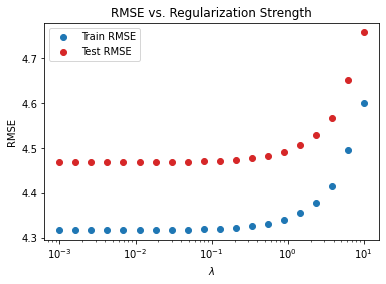

In [85]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.scatter(lambdas, train_RMSEs, c='C0', label='Train RMSE')
ax.scatter(lambdas, test_RMSEs, c='C3', label='Test RMSE')

ax.set_xlabel('$\\lambda$')
ax.set_ylabel('RMSE')
ax.set_title('RMSE vs. Regularization Strength')
ax.legend()

In [95]:
X_Train = standardize(train[['CRIM','ZN','NOX','RM','B','DIS','RAD','LSTAT','CRIM_ZN','NOX_AGE','RM_AGE','TAX_B','RM_RM','LSTAT_LSTAT']].values.copy())
Y_Train = train['MEDV'].values.copy()

alpha_int = 0
beta_int = np.zeros(X_Train.shape[1])

print('Using best lambda')
alpha_ridge, beta_ridge = multivariate_ridge_ols(X_Train, Y_Train, alpha_int, beta_int, lambda_reg=best_lambda ,R=0.001, epsilon=0.00004, MaxIterations=1000000)
print('alpha = {:.2f}'.format(alpha))
print('betas')
print(beta)

#Prediction on train data
Y_Train_predicted = alpha_ridge + np.dot(X_Train,beta_ridge)

# Predicted on test data
X_Test = standardize(test[['CRIM','ZN','NOX','RM','B','DIS','RAD','LSTAT','CRIM_ZN','NOX_AGE','RM_AGE','TAX_B','RM_RM','LSTAT_LSTAT']].values.copy())
Y_Test = test['MEDV'].values.copy()
Y_Test_predicted = alpha_ridge + np.dot(X_Test,beta_ridge)

#RMSE
print("RMSE on Train data: ")
print(compute_RMSE(Y_Train_predicted,Y_Train))

print()
print("RMSE on Test data: ")
print(compute_RMSE(Y_Test_predicted,Y_Test))

Using best lambda
Total Iterations: 152020
Time taken: 19.46 seconds
alpha = 22.58
betas
[-1.30267604e+00  6.82001905e-01 -3.22157887e-01 -8.80905262e+00
  2.04185082e+00 -2.36877809e+00  1.38889332e+00 -1.20437897e+01
  2.60453285e-01 -9.90114504e-03  1.53768682e-01 -1.39768043e+00
  1.14709825e+01  7.41704281e+00]
RMSE on Train data: 
4.160564518377702

RMSE on Test data: 
4.690727047077348


### Discussion

With increase in Lambda, model is becoming less and less complex, and thus training error as well as test error is increasing. In my case the best lambda selected by the model was deemed lambda = 0.001, however it still yielded very similar results with 4.2 & 4.3 at a RMSE on Test data: 4.690727047077348